### Task 1
Протягом 50 років вимірювався рівень води навесні під час повені відносно умовного нуля. Результати вимірювання наведено у вигляді інтервального статистичного розподілу:  

 |x |0-24|24-48|48-72|72-96|96-120|120-144|144-168|168-192|192-216|
 |:-|:--:|:---:|:---:|:---:|:----:|:-----:|:-----:|:-----:|:-----:|
 |ni|  1 |  2  |  4  |  6  |  12  |   16  |   6   |   2   |   1   |  
   
За заданими статистичними розподілами вибірки висунути $Н_0$ про закон розподілу ознаки генеральної сукупності і при рівні значущості а = 0,01 перевірити її правильність.  


Спочатку побудуємо гістограму розподілу виборки, щоб висунути гіпотезу відносно її статистичного розподілу:

In [52]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

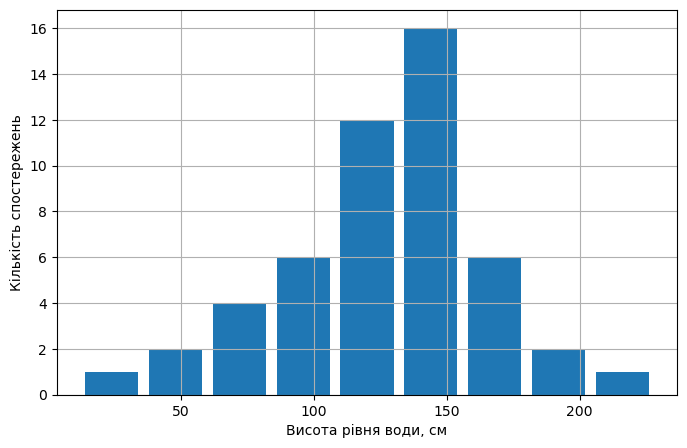

In [53]:
xi = [[0, 24], [24, 48], [48, 72],[72, 96],[96, 120],[120, 144], [144, 168], [168, 192], [192, 216]]
x1 = sorted(list(set([a for b in xi for a in b]))) # borders
x2 = x1[1:]
n = np.array([1, 2, 4, 6, 12, 16, 6, 2, 1])

fig, ax = plt.subplots()
ax.bar(x2, n,  width=20)
fig.set_figwidth(8)   
fig.set_figheight(5)    
plt.xlabel('Висота рівня води, см')
plt.ylabel('Кількість спостережень')
plt.grid()

plt.show()

Наведена вище гістограма дозволяє видвинути гіпотезу $H_0$ щодо нормального розподілу досліджуваної величини.  
Проведемо розрахунки для перевірки гіпотези  $H_0$.

In [54]:
xi = [[0, 24], [24, 48], [48, 72],[72, 96],[96, 120],[120, 144], [144, 168], [168, 192], [192, 216]]
x1 = sorted(list(set([a for b in xi for a in b]))) # borders
x = np.array([sum(i)/2 for i in xi])  # averages
n = np.array([1, 2, 4, 6, 12, 16, 6, 2, 1])
N = sum(n)

# Виборочне середнє
X = sum(x*n)/N 

# Дисперсія
D = sum([n[i]*(x[i] - X)**2 for i in range(len(x))])/N

# Стандартне відхилення
sd = round(D**0.5, 4)

z = [round((i - X)/sd, 2) for i in x1]
z = z[1:-1]              # z values

Fzi_1 = [round(scipy.stats.norm.cdf(i) - 0.5, 4) for i in z] 
Fzi = Fzi_1.copy()  
Fzi.append(0.5)          # Ф(Zi) 
Fzi_1.insert(0, -0.5)    # Ф(Zi-1)
Fzi = np.array(Fzi)
Fzi_1 = np.array(Fzi_1)

pi = Fzi - Fzi_1         # pi
n_ = [round(i * N, 4) for i in pi]  #n` = pi x N

a = [(n[i] - n_[i])**2/n[i] for i in range(len(n))]
K_emp = sum(a)
K_kr = 16.8

print(f'Виборочне середнє значення дорівнює: {X}')
print(f"Дисперсія дорівнює: {round(D, 2)}")
print(f'Середнє квадратичне відхилення дорівнює: {round(sd, 2)}') 
print(f'z-значення: {z}')
print(f'Ф(Zi): {Fzi}')
print(f'Ф(Zi-1): {Fzi_1}')
print(f'pi-значення: {pi}')
print(f'n\'-значення: {n_}')
print(f'K_емпіричне = {round(K_emp, 2)}')
print(f'K_критичне = Х^2(a, r) = {K_kr}')


Виборочне середнє значення дорівнює: 114.72
Дисперсія дорівнює: 1452.44
Середнє квадратичне відхилення дорівнює: 38.11
z-значення: [-2.38, -1.75, -1.12, -0.49, 0.14, 0.77, 1.4, 2.03]
Ф(Zi): [-0.4913 -0.4599 -0.3686 -0.1879  0.0557  0.2794  0.4192  0.4788  0.5   ]
Ф(Zi-1): [-0.5    -0.4913 -0.4599 -0.3686 -0.1879  0.0557  0.2794  0.4192  0.4788]
pi-значення: [0.0087 0.0314 0.0913 0.1807 0.2436 0.2237 0.1398 0.0596 0.0212]
n'-значення: [0.435, 1.57, 4.565, 9.035, 12.18, 11.185, 6.99, 2.98, 1.06]
K_емпіричне = 4.13
K_критичне = Х^2(a, r) = 16.8


**Висновок:** Оскільки отримане значення К_емп = 4.13 є меншим за К_кр = 16.8, то ми маємо підстави для прийняття нашої $H_0$ гіпотези, тобто величина, яка описує спостереження за рівнем води, з рівнем значущості $\alpha$ = 0.01 має нормальний розподіл.